In [0]:
# multi-input인데, 입력 데이터가 다르다
# 그 다르다 함은, 주입력data 옆에 부 입력데이터가 있는것이 아니고,
# 주입력과 부입력data가 전혀 다른 건수로 존재할때(ex: 주입력200만건, 부입력1000건.)

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


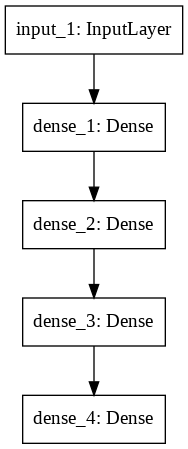

In [0]:
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model

input_dim = 32
inputs_x = Input(shape=(input_dim,))
def create_model(inputs_x):    
    x = Dense(64, activation='relu')(inputs_x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs_x, outputs=x)
    model.summary()

    return model

model_x = create_model(inputs_x)

from keras.utils import plot_model
plot_model(model_x, to_file='model.png')

In [0]:
import numpy as np
N = 10000

"""
 Data generation. x is purely random except that it's first value equals the target y.
    In practice, the network should learn that the target = x[attention_column].
    Therefore, most of its attention should be focused on the value addressed by attention_column.
    :param n: the number of samples to retrieve.
    :param input_dim: the number of dimensions of each element in the series.
    :param attention_column: the column linked to the target. Everything else is purely random.
    :return: x: model inputs, y: model targets
"""
def get_data(n, input_dim, attention_column=1):
    x = np.random.standard_normal(size=(n, input_dim))
    print(x.shape)
    print(x[0])
    y = np.random.randint(low=0, high=2, size=(n, 1))
    print(y.shape)
    print(y[0])
    x[:, attention_column] = y[:, 0] # attention 컬럼에 y에서 0번째 항목을 매핑
    return x, y

input_data_x, output_y = get_data(N, input_dim)
print(input_data_x.shape)
print(output_y.shape)

input_data_y, output_y2 = get_data(100, input_dim, 9)
print(input_data_y.shape)

(10000, 32)
[-0.70065178 -0.59975135 -1.30857961 -0.97643203 -0.3857281  -0.11647708
  1.42533646 -0.27359462  0.5716321  -0.338254   -1.39779164 -0.6742179
  1.5754749   1.11398071  0.26166663 -0.06002876 -0.22224355 -0.30340729
  1.17915844 -0.05760417  0.26554569  1.22846274 -0.68885231 -0.03634022
 -0.14447254  1.96722418 -1.71834791  1.37679462 -0.99546101  0.67297302
  0.44182269  0.79634882]
(10000, 1)
[0]
(10000, 32)
(10000, 1)
(100, 32)
[-1.23638904  0.44110332 -2.18165315 -0.4495486   1.24358794  0.11807836
 -0.16053932 -1.55665872  0.69500157 -0.40749508 -1.92019786  1.34793494
  2.4963287   0.81998468 -0.17294754  0.19205182  0.33361353 -0.82335631
 -0.90250571 -0.32121939  0.25655435  0.43590746 -0.99354867  0.31875477
 -0.26697068 -1.43483939  1.04826116 -0.05818601  0.56353226  1.07328068
 -1.1021529   0.63734755]
(100, 1)
[1]
(100, 32)


In [0]:
model_x.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #categorical_crossentropy
model_x.fit(input_data_x, output_y, epochs=10, batch_size=32, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 87us/step - loss: 0.3400 - accuracy: 0.8508 - val_loss: 0.0271 - val_accuracy: 0.9975
Epoch 2/10
8000/8000 [==============================] - 1s 74us/step - loss: 0.0084 - accuracy: 0.9996 - val_loss: 0.0055 - val_accuracy: 0.9985
Epoch 3/10
8000/8000 [==============================] - 0s 55us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 4/10
8000/8000 [==============================] - 0s 54us/step - loss: 5.4122e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9995
Epoch 5/10
8000/8000 [==============================] - 0s 55us/step - loss: 2.7511e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/10
8000/8000 [==============================] - 0s 49us/step - loss: 1.6893e-04 - accuracy: 1.0000 - val_loss: 8.0651e-04 - val_accuracy: 1.0000
Epoch 7/10
8000/8000 [==============================] - 0s 51us/st

In [0]:
from keras.models import load_model
# 모델 저장
#model_x.save('model_x.h5')
#weight값 저장
model_x.save_weights('model_x_weight') 

In [0]:
ls -alrt

total 156
drwxr-xr-x 1 root root  4096 May 13 16:29 sample_data/
drwxr-xr-x 1 root root  4096 May 20 16:14 .config/
drwxr-xr-x 1 root root  4096 May 22 06:54 ../
drwxr-xr-x 1 root root  4096 May 22 07:00 ./
-rw-r--r-- 1 root root  9655 May 22 07:31 model.png
-rw-r--r-- 1 root root 88192 May 22 07:31 model_x.h5
-rw-r--r-- 1 root root 37944 May 22 07:31 model_x_weight


In [0]:
# 모델 불러오기
#model_x_load = load_model('model_x.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


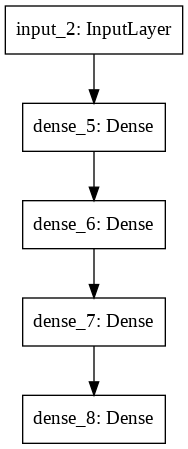

In [0]:
inputs_y = Input(shape=(input_dim,))
model_y = create_model(inputs_y) #동일한 모델 Layer를 그대로 사용

from keras.utils import plot_model
plot_model(model_y, to_file='model.png')

In [0]:
model_y.load_weights('model_x_weight') #weight값 로딩

model_y.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #categorical_crossentropy
model_y.fit(input_data_y, output_y2, epochs=10, batch_size=32, validation_split=0.2) # 새로운 data로 추가학습

Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 5.5007 - accuracy: 0.5750 - val_loss: 11.5356 - val_accuracy: 0.3500
Epoch 2/10
80/80 [==============================] - 0s 162us/step - loss: 4.9449 - accuracy: 0.6250 - val_loss: 11.0010 - val_accuracy: 0.3500
Epoch 3/10
80/80 [==============================] - 0s 155us/step - loss: 4.5063 - accuracy: 0.6375 - val_loss: 10.4774 - val_accuracy: 0.3500
Epoch 4/10
80/80 [==============================] - 0s 134us/step - loss: 4.1214 - accuracy: 0.6500 - val_loss: 9.9608 - val_accuracy: 0.3500
Epoch 5/10
80/80 [==============================] - 0s 142us/step - loss: 3.7624 - accuracy: 0.6625 - val_loss: 9.4448 - val_accuracy: 0.3500
Epoch 6/10
80/80 [==============================] - 0s 166us/step - loss: 3.4690 - accuracy: 0.6750 - val_loss: 8.9325 - val_accuracy: 0.3500
Epoch 7/10
80/80 [==============================] - 0s 169us/step - loss: 3.1206 - accuracy: 0.6750 - v